In [1]:
Rw.<w> = PowerSeriesRing(QQ, default_prec=11)
Rp.<p> = PowerSeriesRing(Rw, default_prec=150)
Ru.<u> = PowerSeriesRing(Rp, default_prec=600)

def B(X, cutoff):
    Y = (1/X).power_series() +O(u^cutoff)
    Y2 = Y^2 + O(u^cutoff)
    accu = bernoulli(2) * Y  / 2 
    YPow = Y
    for k in range(4, cutoff):
        if k%2==0:
            YPow = YPow * Y2 + O(u^cutoff)
            accu = accu + bernoulli(k) * YPow / (k*(k-1))
    return accu
    #return sum( bernoulli(k) * Y^(k-1)  / (k*(k-1)) for k in range(2, cutoff) if k%2 ==0 ) +O(u^cutoff)
def El(l):
    return sum(moebius(l/d)*u^(-d) for d in divisors(l) )/l
def lal(l):
    return u^l*(1-u^l)*l

def wt11Xl(l):
    return sum(moebius(l/d)*(1-w^d+O(w^11)) for d in divisors(l))/l - p* moebius(l) /l
def wt11Yl(l):
    return  - p* moebius(l) /l


def logUl1(X, l, cutoff):
    return ( X*(log( (lal(l)*El(l)).power_series() +O(u^cutoff)) -1) +(-El(l)+X-1/2)*log((1-(X +O(u^(l+cutoff)) )/El(l)).power_series())).power_series()
def logUl2(X, l, cutoff):
    return B(-El(l)+X, cutoff)-B(-El(l), cutoff) 
def logUl2a(X, l, cutoff):
    return B(-El(l)+X, cutoff)
def logUlp1(l, cutoff):
    return logUl1(wt11Xl(l),l,cutoff)
def logUlp2(l, cutoff):
    return logUl2(wt11Xl(l),l,cutoff)
def logUlp2a(l, cutoff):
    return logUl2a(wt11Xl(l),l,cutoff)
def logUlp1n(l, cutoff):
    return logUl1(wt11Yl(l),l,cutoff)
def logUlp2n(l, cutoff):
    return logUl2(wt11Yl(l),l,cutoff)
def logUlp2diff(l, cutoff):
    return logUlp2(l,cutoff)-logUlp2n(l,cutoff)
def logUlp1diff(l, cutoff):
    return logUlp1(l,cutoff)-logUlp1n(l,cutoff)
    
def logUl(X, l, cutoff):
    return logUl1(X, l, cutoff) + logUl2(X, l, cutoff)
    #return ( X*(log( (lal(l)*El(l)).power_series() ) -1) +(-El(l)+X-1/2)*log((1-X/El(l)).power_series())).power_series()+B(-El(l)+X, cutoff)-B(-El(l), cutoff) 
def logUlp(l, cutoff):
    return logUlp1(l, cutoff) + logUlp2(l, cutoff)

def mindeg(X):
    return min([99999] + X.exponents())
def checkgrowth(maxl,cutoff):
    for l in range(1,maxl+1):
        print(l,": ", min([9999]+logUlp2(l,cutoff).exponents() ))


In [2]:
def preZ(cutoff):
    # need to go to twice the cutoff
    #return -u*(exp(sum(logUlp(l,cutoff) for l in range(1, 2*cutoff) ))-1)
    return -u*(exp(sum(logUlp1(l,cutoff)-logUlp1n(l,cutoff) for l in range(1, 2*cutoff) ) + sum(logUlp2(l,cutoff)-logUlp2n(l,cutoff) for l in range(1, cutoff/2) ))-1)
#def makeZ(Z):
#    return sum( u^exp * (c.truncate(11))(1) for exp, c in zip(Z.exponents(), Z.coefficients()) ) +O(u^(Z.prec()))
def makeZ(Z):
    return Z.map_coefficients(lambda cc: cc.map_coefficients(lambda c: (c.truncate(11))(1) ))

def pickwcoeff(Z,j):
    return Z.map_coefficients( lambda c: c[j])
def bigZ(cutoff):
    return makeZ(preZ(cutoff))
def preZl(l, cutoff):
    return  exp(logUlp(l,cutoff))
def preZl2(l, cutoff):
    return  exp(logUlp2(l,cutoff))

In [67]:
%time theZ_100 = bigZ(100)

CPU times: user 37min 56s, sys: 1.08 s, total: 37min 58s
Wall time: 38min 1s


In [68]:
save(theZ_100,"data/bigZ11p_100")

In [116]:
%time theZ_150 = bigZ(150)
save(theZ_150,"data/bigZ11p_150")

CPU times: user 4h 56min 51s, sys: 10.4 s, total: 4h 57min 1s
Wall time: 4h 57min 43s


In [3]:
theZ_150=load("data/bigZ11p_150")

In [20]:
ppow= 0
list_plot([theZ_70[g][ppow][0] / factorial(g+ppow-2) * (2*pi)^g for g in range(15,50)])

IndexError: coefficient not known

In [21]:
theZ_70.prec()


2

In [22]:
theZ_70

O(u^2)

In [24]:
logUlp(1,50).prec()

50

In [25]:
logUlp(10,50).prec()

50

In [26]:
logUlp(10,100).prec()

100

In [31]:
preZ(20).prec()

21

In [32]:
bigZ(20).prec()

21

In [47]:
logUlp(10,100).prec()

100

In [48]:
res = []
for l in range(1,200):
    %time res += logUlp(l,100)

CPU times: user 28min 21s, sys: 880 ms, total: 28min 22s
Wall time: 9h 7min 45s
CPU times: user 3min 48s, sys: 94.4 ms, total: 3min 49s
Wall time: 3min 49s
CPU times: user 59.9 s, sys: 16.9 ms, total: 59.9 s
Wall time: 60 s
CPU times: user 275 ms, sys: 303 μs, total: 275 ms
Wall time: 276 ms
CPU times: user 13.1 s, sys: 3.66 ms, total: 13.1 s
Wall time: 13.1 s
CPU times: user 11.3 s, sys: 3.48 ms, total: 11.3 s
Wall time: 11.3 s
CPU times: user 5.2 s, sys: 2.8 ms, total: 5.2 s
Wall time: 5.22 s
CPU times: user 105 ms, sys: 28 μs, total: 105 ms
Wall time: 105 ms
CPU times: user 114 ms, sys: 37 μs, total: 114 ms
Wall time: 114 ms
CPU times: user 3.85 s, sys: 1.52 ms, total: 3.85 s
Wall time: 3.85 s
CPU times: user 1.47 s, sys: 673 μs, total: 1.48 s
Wall time: 1.48 s
CPU times: user 166 ms, sys: 43 μs, total: 166 ms
Wall time: 166 ms
CPU times: user 819 ms, sys: 335 μs, total: 819 ms
Wall time: 820 ms
CPU times: user 2.04 s, sys: 721 μs, total: 2.04 s
Wall time: 2.04 s
CPU times: user 1.6

In [49]:
res[0].prec()

+Infinity

In [51]:
res[0]


0

In [52]:
res[1]

-1/2*p^2 + (3/2 - w + O(w^11))*p - 1 + 3/2*w - 1/2*w^2 + O(w^11)

In [53]:
len(res)

13074

In [115]:
%time rr=preZ(30)

CPU times: user 12.9 s, sys: 21.1 ms, total: 12.9 s
Wall time: 13 s


In [18]:
%time tZ=bigZ(30)

CPU times: user 12.7 s, sys: 9.56 ms, total: 12.7 s
Wall time: 12.7 s


In [4]:
def p2arr(P, maxn):
    maxC = P.prec()-1
    return [[P[g+j][j][0]*factorial(j) if g+j<maxC and j<P[g+j].prec() else "?" for j in range(maxn+1)] for g in range(P.prec()) ]
def p2arr2(P, maxn):
    maxC = P.prec()-1
    return [[P[g+j][j][0]*factorial(j) if g+j<maxC and j<P[g+j].prec() else 0 for j in range(maxn+1)] for g in range(P.prec()) ]

In [42]:
x=p2arr(tZ,20)

In [43]:
[x[1][n] for n in range(15)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 55, -1925, 55770]

In [40]:
factorial(12)

479001600

In [52]:
tZ[12]

p - 11/2*p^2 + 9/2*p^3 - 7/8*p^4 - 47/120*p^5 - 3/20*p^6 - 1/24*p^7 - 37/10080*p^8 - 11/72576*p^9 - 1/403200*p^10 - 1/39916800*p^11 + O(p^20)

In [64]:
(-u*makeZ(exp(logUlp1diff(3,30))-1))[12]

-8531/11664 + 307/648*p - 25/324*p^2 + 1/486*p^3 + O(p^20)

In [62]:
(-u*makeZ(logUlp1diff(2,30)^11))[12]

0

In [5]:
ecs = p2arr2(theZ_150, 150)

In [50]:
cuto=150
list_plot3d([[ecs[g][n]/ factorial(g+n-2) *(2*pi)^g*(-1)^(g*(g-1)/2+n) if g+n<cuto else 0 for n in range(5,cuto) ] for g in range(2,cuto) ]  )

Graphics3d Object

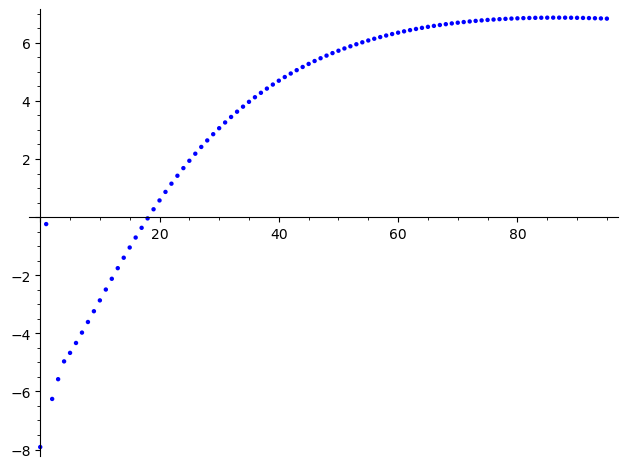

In [48]:
useg=10
list_plot([ecs[useg][n]/ factorial(useg+n-2) *(2*pi)^useg *(-1)^(n+1) for n in range(5,101)])

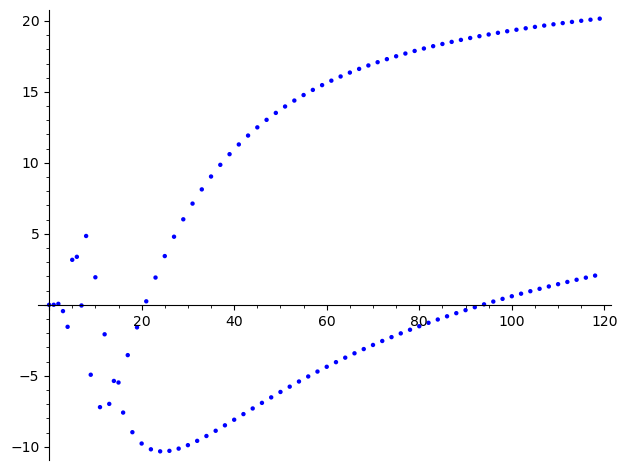

In [19]:
usen=30
ll=list_plot([(ecs[g][usen])/ factorial(g+usen-2) *(2*pi)^g*(-1)^(g*(g-1)/2) for g in range(150-usen)])
ll

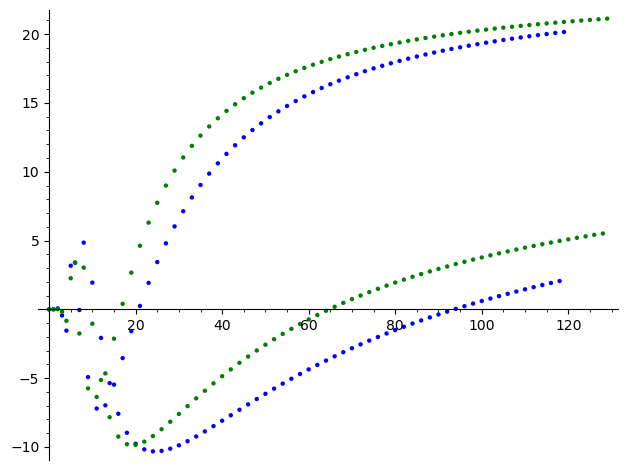

In [22]:
usen=20
lll=ll+list_plot([(ecs[g][usen])/ factorial(g+usen-2) *(2*pi)^g*(-1)^(g*(g-1)/2) for g in range(150-usen)],color="green")
lll

In [23]:
lll.save("ec_wt11_n20_30.pdf")

In [52]:
for g in range(1,151):
    for n in range(151):
        if ecs[g][n] == 0 and g+n<150 and 3*g+2*n>=25:
            print(g,n)

8 1
12 0
